**The code has been implemented in Google Colab.**

In [1]:
%load_ext autoreload
%autoreload 2
path_files = 'software_assignment'

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys

GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', path_files)

files = os.listdir(GOOGLE_DRIVE_PATH)
expected_files = [ 'Task_1.py','Task_2.py','Task_4.py','data.csv']

sys.path.append(GOOGLE_DRIVE_PATH)

# Verify that there are all the expected files in the directory
all_found = True
for expected_file in expected_files:
  if expected_file not in files:
    print(f'Required file {expected_file} not found!')
    all_found = False
if all_found:
  print('All required files are found :)')

All required files are found :)


In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from Task_1 import *
from Task_2 import *
from Task_4 import *

In [ ]:
data = np.genfromtxt('/content/drive/My Drive/software_assignment/data.csv', delimiter=',')
time = []
Sensed_force = []
Des_pos = []
Actual_pos = []
time = data[1:,0]
Sensed_force = data[1:,1]
Des_pos = data[1:,2]
Actual_pos = data[1:,3]

### **Task 1**

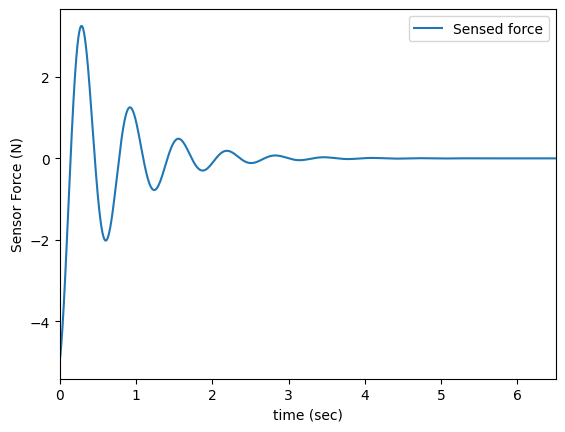

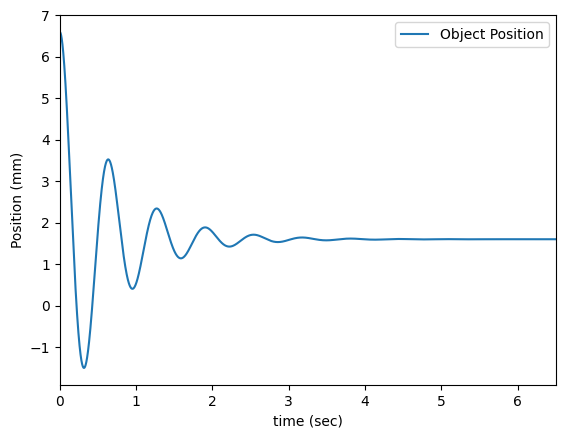

In [ ]:
N = Sensed_force.size
acc_des = np.zeros((N))
vel_des = np.zeros((N))
pos_des = np.zeros((N))
vel_actual = np.zeros((N))
acc_actual = np.zeros((N))
pos_actual = np.zeros((N))
sensed_force_cal = np.zeros((N))
pos_actual[0] = 0.0066  ## assuming the heavy object is floating in the viscous fluid(inital pos is 0) - refer to solution pdf
m = 10
#b = 30
#k = 1000
dt = 0.001
constant_force = -5
surface_model = surface_contact_model(pos_actual[0], dt)

for i in range(1, N):
    # surface contact model gives Sensed_forced eval
    sensed_force_cal[i-1] = surface_model.update_forward(constant_force,pos_actual[i-1], vel_actual[i-1])

    #evaluation for TASK 1
    acc_actual[i] = (sensed_force_cal[i-1])/m
    vel_actual[i] = vel_actual[i-1] + acc_actual[i]*dt
    pos_actual[i] = pos_actual[i-1] + vel_actual[i]*dt

plt.figure()
plt.xlim(left=0,right=6.5)
plt.ylabel('Sensor Force (N)')
plt.xlabel('time (sec)')
#plt.plot(time/1000, Sensed_force)
plt.plot(time/1000, sensed_force_cal)
plt.legend(['Sensed force'])

plt.figure()
plt.xlim(left=0,right=6.5)
plt.ylabel('Position (mm)')
plt.xlabel('time (sec)')
#plt.plot(time/1000, Des_pos)
plt.plot(time/1000, pos_actual*1000)
plt.legend(['Object Position'])

### **TASK 2**

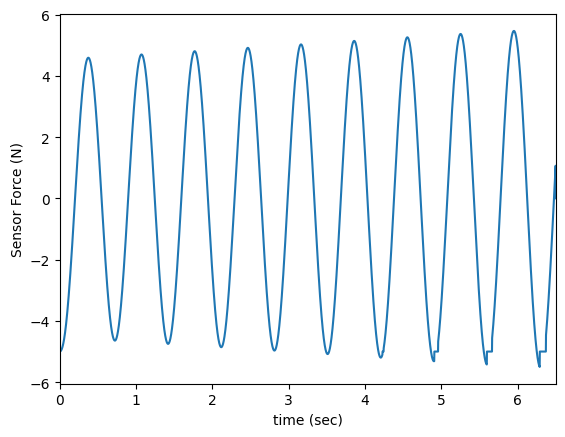

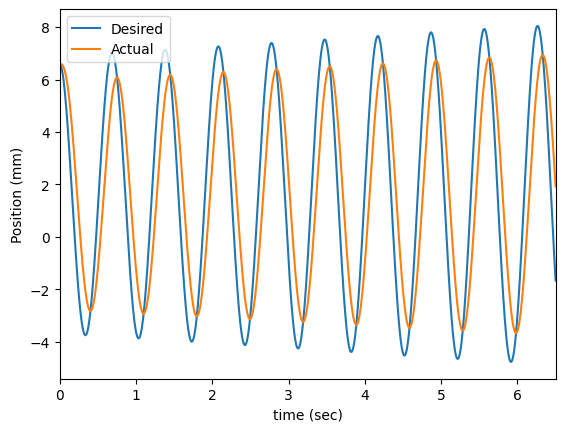

In [ ]:
N = Sensed_force.size
acc_des = np.zeros((N))
vel_des = np.zeros((N))
pos_des = np.zeros((N))
vel_actual = np.zeros((N))
acc_actual = np.zeros((N))
pos_actual = np.zeros((N))
pos_actual[0] = 0.0066
pos_des[0] = 0.0066
sensed_force_cal = np.zeros((N))
#m = 10
#b = 30
dt = 0.001
#k = 1000
constant_force = -5

surface_model1 = surface_contact_model(pos_actual[0], dt)
control_sw = control_software(dt)
robot_arm = robotic_arm(dt)

for i in range(1, N):
    ##sensed force calculation-Surface Contact Model
    sensed_force_cal[i-1] = surface_model.update_forward(constant_force,pos_actual[i-1], vel_actual[i-1])

    ##control software
    acc_des[i], vel_des[i], pos_des[i] = control_sw.desired_eval(sensed_force_cal[i-1], vel_des[i-1], pos_des[i-1])

    ##Robot Arm
    pos_actual[i], vel_actual[i] = robot_arm.update_next(pos_actual[i-1], pos_des[i])


plt.figure()
plt.xlim(left=0,right=6.5)
plt.ylabel('Sensor Force (N)')
plt.xlabel('time (sec)')
plt.plot(time/1000, sensed_force_cal)
#plt.plot(time/1000, Sensed_force)

plt.figure()
plt.xlim(left=0,right=6.5)
plt.ylabel('Position (mm)')
plt.xlabel('time (sec)')
plt.plot(time/1000, pos_des*1000)
plt.plot(time/1000, pos_actual*1000)
#plt.plot(time/1000, Des_pos)
#plt.legend(['Desired', 'Actual','data_des_pos'])
plt.legend(['Desired', 'Actual'])

##### **TASK 4**

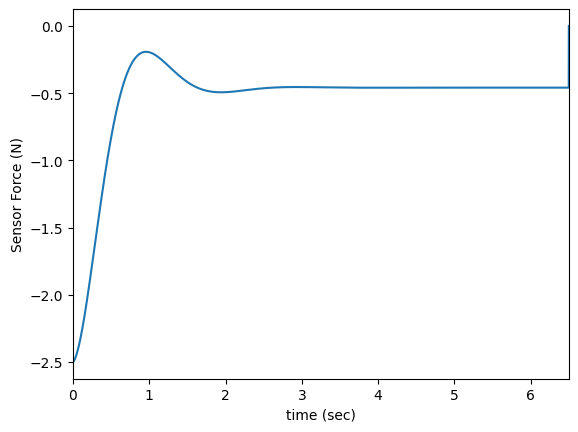

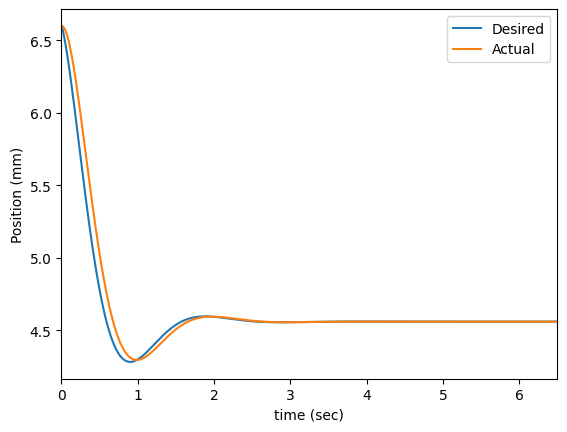

In [ ]:
N = Sensed_force.size
acc_des = np.zeros((N))
vel_des = np.zeros((N))
pos_des = np.zeros((N))
vel_actual = np.zeros((N))
acc_actual = np.zeros((N))
pos_actual = np.zeros((N))
#sum_pos_error = np.zeros((N))
pos_actual[0] = 0.0066
pos_des[0] = 0.0066
sensed_force_cal = np.zeros((N))
#m = 10
#b = 30
dt = 0.001
#k = 1000
constant_force = -2.5

surface_model1 = surface_contact_model(pos_actual[0], dt)
control_sw_new = control_software_new(dt)
robot_arm = robotic_arm(dt)

for i in range(1, N):
    ##sensed force calculation-Surface Contact Model
    sensed_force_cal[i-1] = surface_model.update_forward(constant_force,pos_actual[i-1], vel_actual[i-1])

    ##control software
    acc_des[i], vel_des[i], pos_des[i] = control_sw_new.desired_eval_pi(sensed_force_cal[i-1], vel_des[i-1], pos_des[i-1], vel_actual[i-1], pos_actual[i-1])

    ##Robot Arm
    pos_actual[i], vel_actual[i] = robot_arm.update_next(pos_actual[i-1], pos_des[i])


plt.figure()
plt.xlim(left=0,right=6.5)
plt.ylabel('Sensor Force (N)')
plt.xlabel('time (sec)')
plt.plot(time/1000, sensed_force_cal)
#plt.plot(time/1000, Sensed_force)

plt.figure()
plt.xlim(left=0,right=6.5)
plt.ylabel('Position (mm)')
plt.xlabel('time (sec)')
plt.plot(time/1000, pos_des*1000)
plt.plot(time/1000, pos_actual*1000)
#plt.plot(time/1000, Des_pos)
#plt.legend(['Desired', 'Actual','data_des_pos'])
plt.legend(['Desired', 'Actual'])


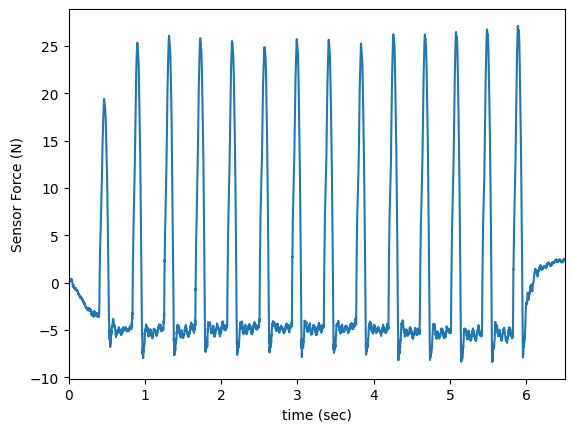

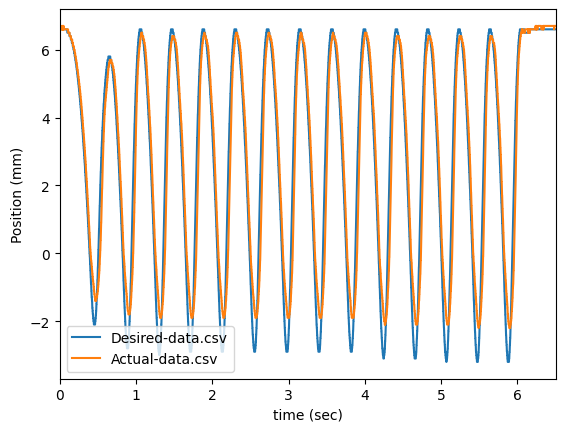

In [ ]:
##Below Grpahs are simulated from data.csv file(just for visulization purpose)
plt.figure()
plt.xlim(left=0,right=6.5)
plt.ylabel('Sensor Force (N)')
plt.xlabel('time (sec)')
plt.plot(time/1000, Sensed_force)

plt.figure()
plt.xlim(left=0,right=6.5)
plt.ylabel('Position (mm)')
plt.xlabel('time (sec)')
plt.plot(time/1000, Des_pos)
plt.plot(time/1000, Actual_pos)
plt.legend(['Desired-data.csv', 'Actual-data.csv'])